![png](../../../imagenes/logotipo-axity-ppt.png)

# Sistemas de recomendación

## Los datos

Utilizaremos el conjunto de datos [Movie Lens](https://grouplens.org/datasets/movielens/100k/).  

Este contiene las calificaciones de MovieLens, un servicio de recomendación de películas.  

El conjunto contiene 100,000 calificaciones de 1000 usuarios para 1700 películas.

Contiene las siguientes columnas:
* Identificador del usuario
* Identificador de la película
* Calificación (0 - 5)
* Marca de tiempo representada en segundos desde la medianoche Hora Universal Coordinada (UTC) del 1 de enero de 1970

### Carga de datos de Movie Lens

In [1]:
# Importemos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importemos los datos
df = pd.read_csv("u.data.csv", sep="\t", header=None)

In [3]:
# Revisemos los datos
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

0    1  2          3
0  196  242  3  881250949
1  186  302  3  891717742
2   22  377  1  878887116
3  244   51  2  880606923
4  166  346  1  886397596

In [5]:
df.shape

(100000, 4)

In [6]:
# Asignemos etiquetas a las columnas
df.columns = ["UserID", "ItemID", "Rating", "TimeStamp"]

In [7]:
df.head()

UserID  ItemID  Rating  TimeStamp
0     196     242       3  881250949
1     186     302       3  891717742
2      22     377       1  878887116
3     244      51       2  880606923
4     166     346       1  886397596

### Análisis exploratorio

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

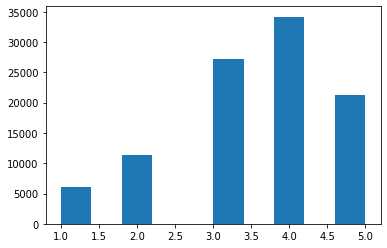

In [9]:
# Revisemos la distribución de las calificaciones
plt.hist(df.Rating)

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <a list of 10 Patch objects>)

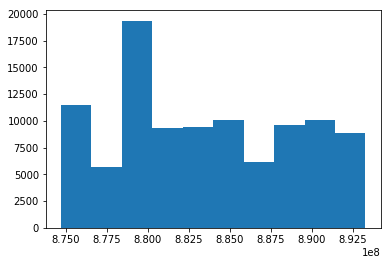

In [17]:
# Revisemos la distribución de las marcas de tiempo
plt.hist(df.TimeStamp)

In [18]:
# Veamos el número de usuarios por cada calificación
df.groupby(["Rating"])["UserID"].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

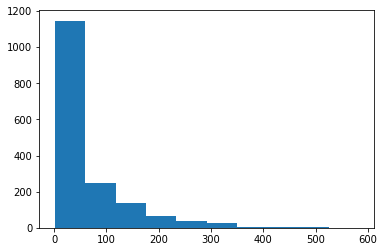

In [28]:
# Veamos la distribución de películas
plt.hist(df.groupby(["ItemID"])["ItemID"].count())

### Representación en forma matricial

In [30]:
# Veamos cuantos usuarios tenemos
n_users = df.UserID.unique().shape[0]
n_users

943

In [31]:
# Veamos ciantas películas tenemos
n_items = df.ItemID.unique().shape[0]
n_items

1682

In [34]:
ratings = np.zeros((n_users, n_items))

In [35]:
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]

In [36]:
type(ratings)

numpy.ndarray

In [37]:
ratings.shape

(943, 1682)

In [38]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [41]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}%".format(sparsity))

Coeficiente de sparseidad: 6.30%


### Crear conjuntos de entrenamiento y validación

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.3, random_state=42)

In [44]:
ratings_train.shape

(660, 1682)

In [45]:
ratings_test.shape

(283, 1682)

## Filtro colaborativo basado en Usuarios
* Matriz de similaridad entre los usuarios (distancia del coseno).
* Predecir la valoración desconocida de un ítem *i* para un usuario activo *u* basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.
* Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores.

In [46]:
import sklearn

In [47]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [48]:
type(sim_matrix)

numpy.ndarray

In [49]:
sim_matrix.shape

(660, 660)

In [50]:
sim_matrix

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [51]:
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

In [52]:
users_predictions

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [53]:
from sklearn.metrics import mean_squared_error

In [157]:
def get_mse(preds, actuals):
    if preds.shape[0] != actuals.shape[0]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [55]:
get_mse(users_predictions, ratings_train)

7.878218313143215

In [56]:
get_mse(users_predictions, ratings_test)

8.745164067978985

## Filtro colaborativo basado en los KNN

In [57]:
from sklearn.neighbors import NearestNeighbors

In [87]:
k = 5

In [88]:
neighbors = NearestNeighbors(k, 'cosine')

In [89]:
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius='cosine')

In [90]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)

In [91]:
top_k_distances.shape

(660, 5)

In [92]:
top_k_distances[0]

array([ 0.        , 41.71330723, 43.3474336 , 45.04442252, 45.04442252])

In [93]:
top_k_users.shape

(660, 5)

In [94]:
top_k_users[0]

array([  0, 211,  16, 583, 428])

In [95]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# para cada usuario del conjunto de entrenamiento
    users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [96]:
users_predicts_k.shape

(660, 1682)

In [97]:
users_predicts_k

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74469557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.9753676 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
get_mse(users_predicts_k, ratings_train)

8.180803170774984

In [99]:
get_mse(users_predicts_k, ratings_test)

11.338914012692959

## Filtro colaborativo basado en Items

In [100]:
n_movies = ratings_train.shape[1]
n_movies

1682

In [101]:
neighbors = NearestNeighbors(n_movies, 'cosine')

In [102]:
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1682, p=2,
         radius='cosine')

In [106]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [104]:
top_k_distances.shape

(1682, 1682)

In [119]:
top_k_distances

array([[ 0.        , 53.12249994, 54.38749856, ..., 77.08436936,
        77.39509028, 79.3473377 ],
       [ 0.        , 27.        , 27.29468813, ..., 72.18032973,
        75.65712128, 80.0874522 ],
       [ 0.        , 24.77902339, 25.05992817, ..., 72.09022125,
        75.27283707, 83.11437902],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 77.12976079,
        80.79603951, 88.63407922],
       [ 0.        ,  1.        ,  3.        , ..., 76.99350622,
        80.7403245 , 88.51553536],
       [ 0.        ,  1.        ,  3.        , ..., 77.03246069,
        80.66597796, 88.51553536]])

In [108]:
top_k_items.shape

(1682, 1682)

In [114]:
top_k_items

array([[   0,  120,  404, ...,  285,  312,  301],
       [   1,  575,  232, ...,  257,   99,   49],
       [   2,  742, 1094, ...,  180,   99,   49],
       ...,
       [1565, 1571, 1570, ...,  180,   99,   49],
       [1680, 1671, 1582, ...,  180,   99,   49],
       [1681, 1596, 1592, ...,  180,   99,   49]])

In [109]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

In [110]:
item_preds.shape

(660, 1682)

In [111]:
item_preds

array([[0.        , 0.31842643, 0.37009323, ..., 1.44850442, 1.4566397 ,
        1.54530823],
       [0.        , 0.0545379 , 0.06227954, ..., 0.20078701, 0.20112087,
        0.21332472],
       [0.        , 0.03522479, 0.04073126, ..., 0.18456903, 0.18654661,
        0.20076303],
       ...,
       [0.        , 0.08968346, 0.10313623, ..., 0.42050197, 0.4196067 ,
        0.45863507],
       [0.        , 0.25835756, 0.29918119, ..., 1.31043371, 1.32278067,
        1.41390683],
       [0.        , 0.07174777, 0.08538024, ..., 0.25535196, 0.25259645,
        0.26199652]])

In [112]:
get_mse(item_preds, ratings_train)

11.172565375125632

In [113]:
get_mse(item_preds, ratings_test)

11.876775601508902

### Filtrado colaborativo basado en KNN

In [120]:
k = 30
neighbors = NearestNeighbors(k, 'cosine')
neighbors.fit(ratings_train.T)
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [121]:
top_k_distances.shape

(1682, 30)

In [122]:
top_k_items[0]

array([  0, 120, 404, 116, 221, 150, 117, 180,   6, 741,  27,  94, 256,
       236, 124,  81,  24, 587, 227, 110, 234,  78, 203, 545,  70,  14,
        68, 596,  49, 143])

In [123]:
top_k_distances[0]

array([ 0.        , 53.12249994, 54.38749856, 55.50675635, 56.49778757,
       56.9473441 , 57.21013896, 57.81003373, 58.10335619, 58.16356248,
       58.19793811, 58.37807808, 58.70264049, 58.83876273, 58.97457079,
       59.52310476, 59.61543424, 59.84981203, 59.89156869, 59.94163828,
       60.15812497, 60.35726965, 60.37383539, 60.63002556, 60.86049622,
       61.11464636, 61.31883887, 61.37589103, 61.57109712, 61.80614856])

In [139]:
preds = np.zeros(ratings_train.T.shape)
for i in range(ratings_train.T.shape[0]):
    if(i%50==0):
        print("iter "+str(i))
    den = 1
    if (np.abs(top_k_distances[i]).sum(axis=0)>0):
        den = np.abs(top_k_distances[i]).sum(axis=0)
    preds[i, :] = top_k_distances[i].dot(ratings_train.T[top_k_items][i])/np.array([den]).T

iter0
iter50
iter100
iter150
iter200
iter250
iter300
iter350
iter400
iter450
iter500
iter550
iter600
iter650
iter700
iter750
iter800
iter850
iter900
iter950
iter1000
iter1050
iter1100
iter1150
iter1200
iter1250
iter1300
iter1350
iter1400
iter1450
iter1500
iter1550
iter1600
iter1650


In [158]:
get_mse(preds, ratings_train)

8.732017359673444

In [159]:
get_mse(preds, ratings_test)

11.569842429886506

In [152]:
preds.shape

(1682, 660)

In [153]:
ratings_train.shape

(660, 1682)

In [154]:
ratings_test.shape

(283, 1682)